### **Loading the data and libraries**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [18]:
sixcrypto = pd.read_csv(r"C:\Users\sahmed\Desktop\Shahzad\DS\CIND 820\Shahzad/sixcrypto.csv") 
df=pd.DataFrame(sixcrypto)

### **EDA Analysis**

In [19]:
df.head(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Litecoin,LTC,1/01/17,4.52153,4.32871,4.32912,4.51159,11337500.0,221718274.9
1,2,Litecoin,LTC,1/02/17,4.73766,4.48466,4.52045,4.64894,14595300.0,228536447.6
2,3,Litecoin,LTC,1/03/17,4.73184,4.56487,4.65588,4.62620,10055700.0,227483920.9
3,4,Litecoin,LTC,1/04/17,4.83785,4.63375,4.63375,4.83785,13762400.0,237966484.3
4,5,Litecoin,LTC,1/05/17,4.94586,4.22687,4.91437,4.29272,19196000.0,211212252.1


In [20]:
df.tail(5)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
9403,9404,Bitcoin,BTC,7/02/21,33939.58870,32770.68078,33549.60018,33897.04859,3.872897e+10,6.350000e+11
9404,9405,Bitcoin,BTC,7/03/21,34909.25990,33402.69654,33854.42136,34668.54840,2.438396e+10,6.500000e+11
9405,9406,Bitcoin,BTC,7/04/21,35937.56715,34396.47746,34665.56487,35287.77977,2.492431e+10,6.620000e+11
9406,9407,Bitcoin,BTC,7/05/21,35284.34443,33213.66103,35284.34443,33746.00246,2.672155e+10,6.330000e+11
9407,9408,Bitcoin,BTC,7/06/21,35038.53636,33599.91617,33723.50966,34235.19345,2.650126e+10,6.420000e+11


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9408 entries, 0 to 9407
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        9408 non-null   int64  
 1   Name       9408 non-null   object 
 2   Symbol     9408 non-null   object 
 3   Date       9408 non-null   object 
 4   High       9408 non-null   float64
 5   Low        9408 non-null   float64
 6   Open       9408 non-null   float64
 7   Close      9408 non-null   float64
 8   Volume     9408 non-null   float64
 9   Marketcap  9408 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 735.1+ KB


In [22]:
df['Name'].value_counts()

Litecoin        1648
Dogecoin        1648
Ethereum        1648
Bitcoin         1648
Binance Coin    1442
Cardano         1374
Name: Name, dtype: int64

In [23]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,9408.00,9408.000000,9408.000000,9408.000000,9408.000000,9.408000e+03,9.408000e+03
mean,4704.50,2245.295646,2108.906402,2180.657656,2184.400885,5.842552e+09,5.086161e+10
std,2716.00,7297.368485,6823.156874,7078.638652,7085.991856,1.265555e+10,1.334378e+11
min,1.00,0.000205,0.000195,0.000197,0.000197,9.284190e+03,9.986680e+06
25%,2352.75,0.106060,0.097015,0.101122,0.101356,8.131160e+07,1.184531e+09
50%,4704.50,43.389924,41.002500,42.346300,42.381472,5.721684e+08,4.387144e+09
75%,7056.25,349.787671,319.871525,337.859691,337.940247,5.068277e+09,3.859717e+10
max,9408.00,64863.098910,62208.964370,63523.754870,63503.457930,3.510000e+11,1.190000e+12


In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SNo,9408.0,4.704500e+03,2.716000e+03,1.000000e+00,2.352750e+03,4.704500e+03,7.056250e+03,9.408000e+03
High,9408.0,2.245296e+03,7.297368e+03,2.048400e-04,1.060599e-01,4.338992e+01,3.497877e+02,6.486310e+04
Low,9408.0,2.108906e+03,6.823157e+03,1.946130e-04,9.701510e-02,4.100250e+01,3.198715e+02,6.220896e+04
Open,9408.0,2.180658e+03,7.078639e+03,1.966920e-04,1.011220e-01,4.234630e+01,3.378597e+02,6.352375e+04
Close,9408.0,2.184401e+03,7.085992e+03,1.967090e-04,1.013561e-01,4.238147e+01,3.379402e+02,6.350346e+04
Volume,9408.0,5.842552e+09,1.265555e+10,9.284190e+03,8.131160e+07,5.721684e+08,5.068277e+09,3.510000e+11
Marketcap,9408.0,5.086161e+10,1.334378e+11,9.986680e+06,1.184531e+09,4.387144e+09,3.859717e+10,1.190000e+12


In [25]:
df.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [26]:
df.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [27]:
print("------  Data Types  ----- \n",df.dtypes)

------  Data Types  ----- 
 SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object


In [28]:
df.duplicated().value_counts()

False    9408
dtype: int64

### **Panda's Profiling**

In [29]:
# import pandas_profiling
# profile = pandas_profiling.ProfileReport(pd.read_csv(r'C:\Users\sahmed\Desktop\Shahzad\DS\CIND 820\Shahzad/sixcrypto.csv'))
# profile

In [30]:
# profile.to_widgets()

In [31]:
# profile.to_file("CryptoAnalysis.html")

### **Correlation**

In [32]:
# load the dataset
df = pd.read_csv("sixcrypto.csv")

# select only the numerical columns
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']
num_df = df[num_cols]

# calculate the correlation matrix
corr_matrix = num_df.corr()

print(corr_matrix)

               Open      High       Low     Close    Volume  Marketcap
Open       1.000000  0.999546  0.999109  0.998901  0.749004   0.968995
High       0.999546  1.000000  0.999053  0.999525  0.750852   0.969801
Low        0.999109  0.999053  1.000000  0.999423  0.744467   0.969238
Close      0.998901  0.999525  0.999423  1.000000  0.748179   0.970084
Volume     0.749004  0.750852  0.744467  0.748179  1.000000   0.807050
Marketcap  0.968995  0.969801  0.969238  0.970084  0.807050   1.000000


### **Correlation HeatMap**

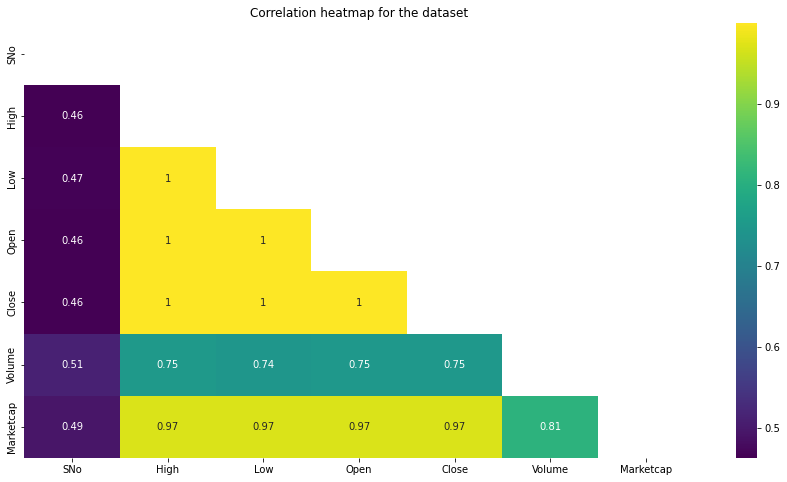

In [33]:
# Correlation heatmap
plt.figure(figsize=(15,8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='viridis')
plt.title("Correlation heatmap for the dataset")
plt.show()

### **Principal Component Analysis (PCA)**

In [34]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date')

# Select the features to use in PCA
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']
x = df.loc[:, features].values

# Standardize the data
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a new dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df.index)

# Concatenate the principal components dataframe with the original dataframe
df_pca = pd.concat([pca_df, df], axis=1)

# Visualize the results
import plotly.express as px

fig = px.scatter(df_pca, x='PC1', y='PC2', color='Name', title='PCA of Cryptocurrency Data')
fig.show()


### **Comparison of original features model and the PCA model**

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date')

# Select the features to use
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']
X = df[features].values
y = df['Close'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model on the original features
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Compute the metrics for the original features model
print("Original features model metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

# Perform PCA on the features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Create a new dataframe with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=df.index)

# Concatenate the principal components dataframe with the original dataframe
X_pca = np.hstack((pca_df.values, X))
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Fit the linear regression model on the principal components
lr_pca = LinearRegression()
lr_pca.fit(X_pca_train, y_train)
y_pred_pca = lr_pca.predict(X_pca_test)

# Compute the metrics for the PCA model
print("\nPCA model metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_pca))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_pca))
print("R-squared:", r2_score(y_test, y_pred_pca))
print("Adjusted R-squared:", 1 - (1-r2_score(y_test, y_pred_pca))*(len(y_test)-1)/(len(y_test)-X_pca_test.shape[1]-1))

Original features model metrics:
Mean Squared Error: 1.6000283876990543e-18
Mean Absolute Error: 7.095594159650725e-10
R-squared: 1.0
Adjusted R-squared: 1.0

PCA model metrics:
Mean Squared Error: 3.2851199926259754e-18
Mean Absolute Error: 7.282189338602946e-10
R-squared: 1.0
Adjusted R-squared: 1.0


### **Data Visualization**

In [36]:
import plotly.express as px
import pandas as pd

# load data
df = pd.read_csv('sixcrypto.csv')

# filter data for six cryptocurrencies and six years
crypto_list = ['Bitcoin', 'Ethereum', 'Dogecoin', 'Litecoin', 'Binance Coin', 'Cardano']
df = df[df['Name'].isin(crypto_list) & (df['Date'] >= '2017-01-01')]

# convert date to year
df['Year'] = pd.DatetimeIndex(df['Date']).year

# group data by cryptocurrency and year
grouped_df = df.groupby(['Name', 'Year'])['Marketcap'].sum().reset_index()

# plot data
fig = px.line(grouped_df, x='Year', y='Marketcap', color='Name', line_group='Name',
              title='Cryptocurrency Market Cap (Million USD) by Year')
fig.update_layout(legend_title='Cryptocurrency')
fig.show()

In [37]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv('sixcrypto.csv')

# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the price difference between closing and opening prices
df['Price_Differnce'] = df['Close'] - df['Open']

# Set the background color
fig.update_layout(plot_bgcolor='rgb(240, 240, 240)')

# Plot the data
fig = px.line(df, x='Date', y='Price_Differnce', color='Name', title='Historical difference between closing and opening price of Crypto since 2017')

fig.show()

In [38]:
# Load the data
df = pd.read_csv('sixcrypto.csv')

# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily price spread
df['Daily_Price_Spread'] = df['High'] - df['Low']

# Plot the data
fig = px.line(df, x='Date', y='Daily_Price_Spread', color='Name', title='Historical difference between High and low prices for each day by currency')

fig.show()

## **Time-Series Forecasting-Simple Moving Average(SMA)**

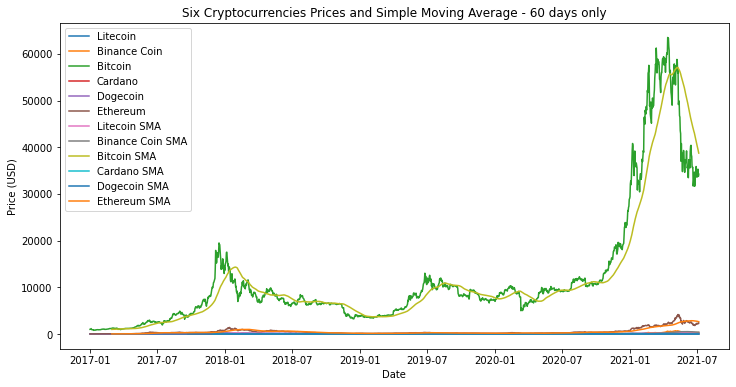

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date')

# Filter data for the six currencies
df_litecoin = df[df['Symbol'] == 'LTC']
df_binance = df[df['Symbol'] == 'BNB']
df_bitcoin = df[df['Symbol'] == 'BTC']
df_cardano = df[df['Symbol'] == 'ADA']
df_dogecoin = df[df['Symbol'] == 'DOGE']
df_ethereum = df[df['Symbol'] == 'ETH']

# Calculate the 30-day Simple Moving Average (SMA) for each currency
sma_litecoin = df_litecoin['Close'].rolling(window=60).mean()
sma_binance = df_binance['Close'].rolling(window=60).mean()
sma_bitcoin = df_bitcoin['Close'].rolling(window=60).mean()
sma_cardano = df_cardano['Close'].rolling(window=60).mean()
sma_dogecoin = df_dogecoin['Close'].rolling(window=60).mean()
sma_ethereum = df_ethereum['Close'].rolling(window=60).mean()

# Plot the time series data and the SMA for each currency in one figure
plt.figure(figsize=(12, 6))
plt.plot(df_litecoin['Close'], label='Litecoin')
plt.plot(df_binance['Close'], label='Binance Coin')
plt.plot(df_bitcoin['Close'], label='Bitcoin')
plt.plot(df_cardano['Close'], label='Cardano')
plt.plot(df_dogecoin['Close'], label='Dogecoin')
plt.plot(df_ethereum['Close'], label='Ethereum')
plt.plot(sma_litecoin, label='Litecoin SMA')
plt.plot(sma_binance, label='Binance Coin SMA')
plt.plot(sma_bitcoin, label='Bitcoin SMA')
plt.plot(sma_cardano, label='Cardano SMA')
plt.plot(sma_dogecoin, label='Dogecoin SMA')
plt.plot(sma_ethereum, label='Ethereum SMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Six Cryptocurrencies Prices and Simple Moving Average - 60 days only')
plt.legend()
plt.show()

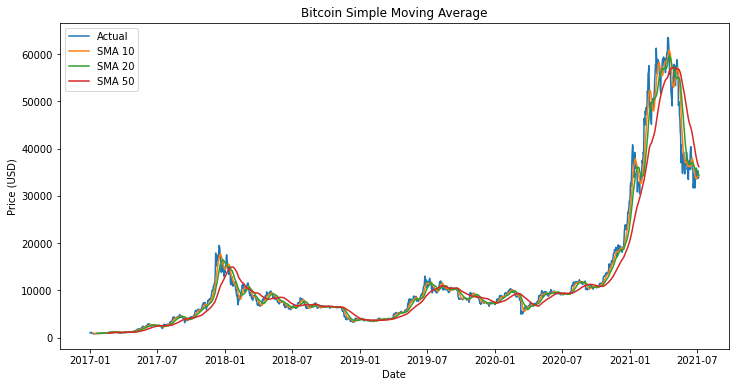

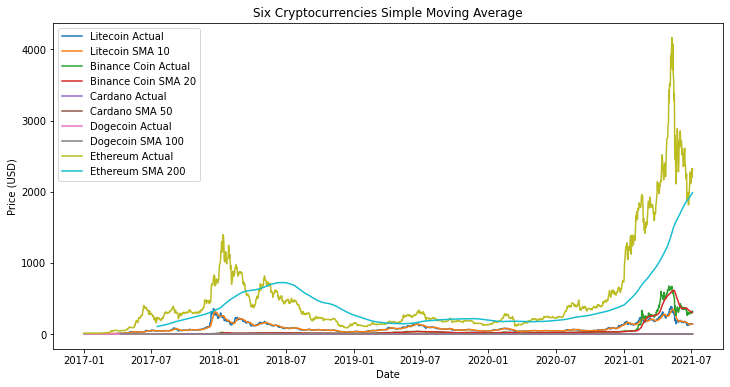

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define a custom date parser function
dateparse = lambda dates: pd.to_datetime(dates, format='%m/%d/%y')

# Load the data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)

# Filter data for the six currencies
df_litecoin = df[df['Symbol'] == 'LTC']
df_binance = df[df['Symbol'] == 'BNB']
df_bitcoin = df[df['Symbol'] == 'BTC']
df_cardano = df[df['Symbol'] == 'ADA']
df_dogecoin = df[df['Symbol'] == 'DOGE']
df_ethereum = df[df['Symbol'] == 'ETH']

# Define the function to calculate Simple Moving Average
def calculate_sma(data, window_size):
    sma = data.rolling(window=window_size).mean()
    return sma

# Calculate Simple Moving Averages for Bitcoin
sma_10 = calculate_sma(df_bitcoin['Close'], 10)
sma_20 = calculate_sma(df_bitcoin['Close'], 20)
sma_50 = calculate_sma(df_bitcoin['Close'], 50)

# Plot the Simple Moving Averages and Actual Prices for Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(df_bitcoin['Close'], label='Actual')
plt.plot(sma_10, label='SMA 10')
plt.plot(sma_20, label='SMA 20')
plt.plot(sma_50, label='SMA 50')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Simple Moving Average')
plt.legend()
plt.show()

# Calculate Simple Moving Averages for other cryptocurrencies
sma_10 = calculate_sma(df_litecoin['Close'], 10)
sma_20 = calculate_sma(df_binance['Close'], 20)
sma_50 = calculate_sma(df_cardano['Close'], 50)
sma_100 = calculate_sma(df_dogecoin['Close'], 100)
sma_200 = calculate_sma(df_ethereum['Close'], 200)

# Plot the Simple Moving Averages and Actual Prices for other cryptocurrencies
plt.figure(figsize=(12, 6))
plt.plot(df_litecoin['Close'], label='Litecoin Actual')
plt.plot(sma_10, label='Litecoin SMA 10')
plt.plot(df_binance['Close'], label='Binance Coin Actual')
plt.plot(sma_20, label='Binance Coin SMA 20')
plt.plot(df_cardano['Close'], label='Cardano Actual')
plt.plot(sma_50, label='Cardano SMA 50')
plt.plot(df_dogecoin['Close'], label='Dogecoin Actual')
plt.plot(sma_100, label='Dogecoin SMA 100')
plt.plot(df_ethereum['Close'], label='Ethereum Actual')
plt.plot(sma_200, label='Ethereum SMA 200')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Six Cryptocurrencies Simple Moving Average')
plt.legend()
plt.show()


### **Evaluation of SMA Model**

In [41]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('sixcrypto.csv')

# Define the function to calculate Simple Moving Average
def calculate_sma(data, window_size):
    sma = data.rolling(window=window_size).mean()
    return sma

# Define a dictionary to store the results for each currency
results = {}

# Calculate Simple Moving Averages and errors for each currency
for symbol in df['Symbol'].unique():
    df_curr = df[df['Symbol'] == symbol]
    sma_10 = calculate_sma(df_curr['Close'], 10)
    mse = np.mean((sma_10 - df_curr['Close']) ** 2)
    mae = np.mean(abs(sma_10 - df_curr['Close']))
    results[symbol] = {'MSE': mse, 'MAE': mae}

# Print out the results in a tabular format
print("{:<15} {:<15} {:<15}".format('Currency', 'MSE', 'MAE'))
for symbol in results:
    print("{:<15} {:<15.10f} {:<15.10f}".format(symbol, results[symbol]['MSE'], results[symbol]['MAE']))

Currency        MSE             MAE            
LTC             205.4068753610  7.0718967543   
ADA             0.0038067931    0.0252276064   
BNB             310.4988753918  4.7938213184   
DOGE            0.0003538886    0.0034755278   
ETH             8648.5284246051 39.6044343466  
BTC             1865928.1037024604 682.9489892024 


### **Corrlation of Prdicted and Actual value of SMA Model**

In [42]:
import pandas as pd
import numpy as np

# Load the dataset
df1 = pd.read_csv('sixcrypto.csv')

# Define window size for SMA
window_size = 60

# Create a dictionary to store correlation coefficients for each currency
corr_dict = {}

# Iterate over each currency in the dataset
for currency in df1['Symbol'].unique():
    
    # Select rows for the current currency
    curr_df = df1[df1['Symbol'] == currency].copy()
    
    # Calculate the SMA with window size of 60 days
    curr_df['SMA'] = curr_df['Close'].rolling(window_size).mean()

    # Generate predicted prices using SMA
    curr_df['Predicted'] = curr_df['SMA'].shift(1)

    # Drop the first row, since it has NaN values
    curr_df = curr_df.dropna()

    # Calculate the correlation between the predicted and actual prices
    corr = np.corrcoef(curr_df['Close'], curr_df['Predicted'])[0,1]
    
    # Store the correlation coefficient for the current currency in the dictionary
    corr_dict[currency] = corr

# Create a dataframe from the dictionary of correlation coefficients
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['Correlation Coefficient'])

# Sort the dataframe by correlation coefficient in descending order
corr_df = corr_df.sort_values(by='Correlation Coefficient', ascending=False)

# Print the dataframe
print(corr_df)

      Correlation Coefficient
BTC                  0.951533
ETH                  0.935910
ADA                  0.929577
BNB                  0.899203
LTC                  0.848562
DOGE                 0.830772


### **Exponential Smoothing (ES)** 

In [44]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'])

# Define function to calculate ES model
def calc_es_model(data):
    model = ExponentialSmoothing(data)
    fit = model.fit()
    mse = ((fit.resid ** 2).sum()) / len(fit.resid)
    mae = fit.resid.abs().sum() / len(fit.resid)
    return {'MSE': mse, 'MAE': mae}

# Calculate ES model for each currency
results = {}
for currency in df['Symbol'].unique():
    currency_data = df.loc[df['Symbol'] == currency]['Close']
    results[currency] = calc_es_model(currency_data)

# Display results in table
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = 'Currency'
print(results_df)

                    MSE         MAE
Currency                           
LTC           66.108048    3.873250
ADA            0.001610    0.014673
BNB          115.148700    2.896497
DOGE           0.000139    0.002135
ETH         3040.757465   22.106110
BTC       624621.840578  366.584262


c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ig

### **Visualizing the Exponential Smoothing (ES) model** 

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D w

<function matplotlib.pyplot.show(close=None, block=None)>

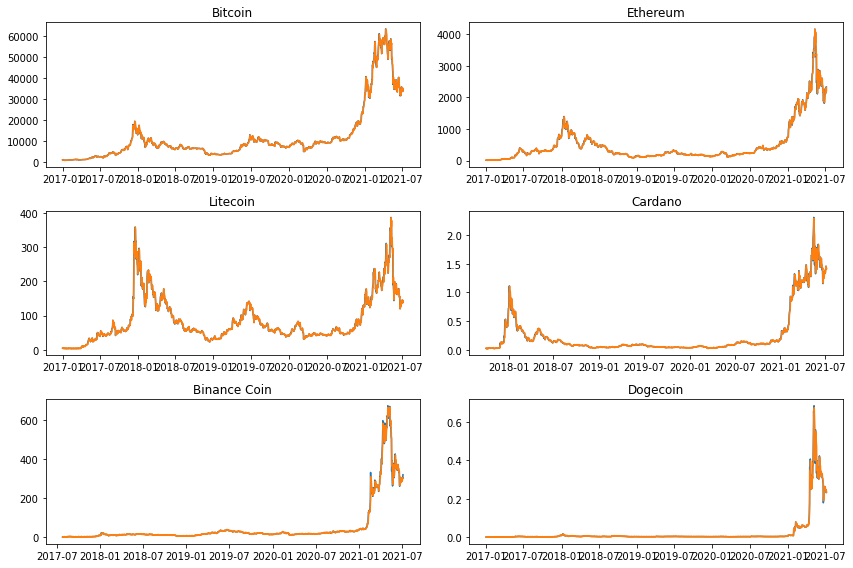

In [45]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Load data from CSV file
df = pd.read_csv('sixcrypto.csv')

# Convert date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Set date column as index
df.set_index('Date', inplace=True)

# Separate data for each currency
btc_df = df[df['Name'] == 'Bitcoin']
eth_df = df[df['Name'] == 'Ethereum']
ltc_df = df[df['Name'] == 'Litecoin']
ada_df = df[df['Name'] == 'Cardano']
bnb_df = df[df['Name'] == 'Binance Coin']
doge_df = df[df['Name'] == 'Dogecoin']

# Apply SE model to each currency's time series data
btc_se_model = ExponentialSmoothing(btc_df['Close'], seasonal_periods=12, trend='add', seasonal='add').fit()
eth_se_model = ExponentialSmoothing(eth_df['Close'], seasonal_periods=12, trend='add', seasonal='add').fit()
ltc_se_model = ExponentialSmoothing(ltc_df['Close'], seasonal_periods=12, trend='add', seasonal='add').fit()
ada_se_model = ExponentialSmoothing(ada_df['Close'], seasonal_periods=12, trend='add', seasonal='add').fit()
bnb_se_model = ExponentialSmoothing(bnb_df['Close'], seasonal_periods=12, trend='add', seasonal='add').fit()
doge_se_model = ExponentialSmoothing(doge_df['Close'], seasonal_periods=12, trend='add', seasonal='add').fit()

# Plot original time series data and SE model's fitted values for each currency
fig, axs = plt.subplots(3, 2, figsize=(12, 8))
axs = axs.flatten()

axs[0].plot(btc_df.index, btc_df['Close'], label='Actual')
axs[0].plot(btc_df.index, btc_se_model.fittedvalues, label='Fitted')
axs[0].set_title('Bitcoin')

axs[1].plot(eth_df.index, eth_df['Close'], label='Actual')
axs[1].plot(eth_df.index, eth_se_model.fittedvalues, label='Fitted')
axs[1].set_title('Ethereum')

axs[2].plot(ltc_df.index, ltc_df['Close'], label='Actual')
axs[2].plot(ltc_df.index, ltc_se_model.fittedvalues, label='Fitted')
axs[2].set_title('Litecoin')

axs[3].plot(ada_df.index, ada_df['Close'], label='Actual')
axs[3].plot(ada_df.index, ada_se_model.fittedvalues, label='Fitted')
axs[3].set_title('Cardano')

axs[4].plot(bnb_df.index, bnb_df['Close'], label='Actual')
axs[4].plot(bnb_df.index, bnb_se_model.fittedvalues, label='Fitted')
axs[4].set_title('Binance Coin')

axs[5].plot(doge_df.index, doge_df['Close'], label='Actual')
axs[5].plot(doge_df.index, doge_se_model.fittedvalues, label='Fitted')
axs[5].set_title('Dogecoin')

plt.tight_layout()
plt.show

### **Correlation of Predicted and actual value of SE Model**

In [46]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
from scipy.stats import pearsonr

# Load the data from the CSV file
df = pd.read_csv('sixcrypto.csv')

# Define the time series to be analyzed
time_series = df['Close']

# Set the parameters for the ES model
alpha = 0.5  # Smoothing parameter

# Initialize an empty list to store the correlation coefficients
corr_coeffs = []

# Loop over each currency in the data
for currency in df['Name'].unique():
    # Extract the time series for the current currency
    currency_ts = df[df['Name'] == currency]['Close']
    
    # Apply the ES model to the time series
    es_model = ExponentialSmoothing(currency_ts, trend='add', seasonal=None, initialization_method="estimated")
    es_fit = es_model.fit(smoothing_level=alpha, optimized=True)
    es_pred = es_fit.predict(start=0, end=len(currency_ts)-1)
    
    # Calculate the correlation coefficient between the predicted and actual values
    corr_coeff, _ = pearsonr(currency_ts, es_pred)
    corr_coeffs.append(corr_coeff)

# Print the results in tabular format
results = pd.DataFrame({'Name': df['Name'].unique(), 'Correlation Coefficient': corr_coeffs})
print(results)


           Name  Correlation Coefficient
0      Litecoin                 0.990534
1       Cardano                 0.994083
2  Binance Coin                 0.994906
3      Dogecoin                 0.986102
4      Ethereum                 0.995548
5       Bitcoin                 0.997697


c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ig

### **Time-Series Forecasting- ARIMA**

In [48]:
import pandas as pd
import statsmodels.api as sm

# Load the data from a CSV file
data = pd.read_csv('sixcrypto.csv')

# Create a dictionary to store the models for each currency
models = {}

# Loop through each currency
for symbol in ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']:
    # Select the data for the current currency
    currency_data = data[data['Symbol'] == symbol]
    
    # Convert the date column to a datetime object and set it as the index
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data.set_index('Date', inplace=True)
    
    # Fit a SARIMAX model to the data
    model = sm.tsa.SARIMAX(currency_data['Close'], order=(1, 1, 1), trend='c')
    results = model.fit()
    
    # Add the model to the dictionary
    models[symbol] = results

    # Print the summary output for the model
    print(f"Summary for {symbol}:")
    print(results.summary())
    print("="*60)


C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\2889962892.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Summary for LTC:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1648
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5786.431
Date:                Tue, 07 Mar 2023   AIC                          11580.862
Time:                        19:58:09   BIC                          11602.489
Sample:                    01-01-2017   HQIC                         11588.881
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1440      0.381      0.378      0.705      -0.602       0.891
ar.L1         -0.7702      0.068    -11.398      0.000      -0.903      -0.638
ma.L1          0.7306      0.071   

C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\2889962892.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\U

Summary for ADA:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1374
Model:               SARIMAX(1, 1, 1)   Log Likelihood                2485.018
Date:                Tue, 07 Mar 2023   AIC                          -4962.037
Time:                        19:58:10   BIC                          -4941.138
Sample:                    10-02-2017   HQIC                         -4954.217
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.002      0.989      0.323      -0.002       0.005
ar.L1         -0.7293      0.024    -29.782      0.000      -0.777      -0.681
ma.L1          0.5943      0.029   

C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\2889962892.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Summary for BNB:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1442
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -5451.449
Date:                Tue, 07 Mar 2023   AIC                          10910.899
Time:                        19:58:11   BIC                          10931.991
Sample:                    07-26-2017   HQIC                         10918.772
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3373      0.394      0.857      0.391      -0.434       1.109
ar.L1         -0.5271      0.029    -17.931      0.000      -0.585      -0.469
ma.L1          0.3343      0.033   

C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\2889962892.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Summary for DOGE:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1648
Model:               SARIMAX(1, 1, 1)   Log Likelihood                4980.182
Date:                Tue, 07 Mar 2023   AIC                          -9952.363
Time:                        19:58:12   BIC                          -9930.737
Sample:                    01-01-2017   HQIC                         -9944.344
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      0.488      0.626      -0.001       0.001
ar.L1         -0.5525      0.022    -24.963      0.000      -0.596      -0.509
ma.L1          0.4310      0.024  

C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\2889962892.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Summary for ETH:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1648
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -8921.347
Date:                Tue, 07 Mar 2023   AIC                          17850.694
Time:                        19:58:12   BIC                          17872.321
Sample:                    01-01-2017   HQIC                         17858.714
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5408      2.381      1.067      0.286      -2.126       7.207
ar.L1         -0.8169      0.015    -54.228      0.000      -0.846      -0.787
ma.L1          0.6963      0.021   

C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\2889962892.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Summary for BTC:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1648
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -13323.820
Date:                Tue, 07 Mar 2023   AIC                          26655.640
Time:                        19:58:13   BIC                          26677.267
Sample:                    01-01-2017   HQIC                         26663.659
                         - 07-06-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     21.5055     29.674      0.725      0.469     -36.655      79.666
ar.L1         -0.5601      0.096     -5.812      0.000      -0.749      -0.371
ma.L1          0.4872      0.104   

In [49]:
import pandas as pd
import statsmodels.api as sm

# Load the data from a CSV file
data = pd.read_csv('sixcrypto.csv')

# Create a dictionary to store the models for each currency
models = {}

# Loop through each currency
for symbol in ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']:
    # Select the data for the current currency
    currency_data = data[data['Symbol'] == symbol]
    
    # Convert the date column to a datetime object and set it as the index
    currency_data['Date'] = pd.to_datetime(currency_data['Date'])
    currency_data.set_index('Date', inplace=True)
    
    # Fit a SARIMAX model to the data
    model = sm.tsa.SARIMAX(currency_data['Close'], order=(1, 1, 1), trend='c')
    results = model.fit()
    
    # Add the model to the dictionary
    models[symbol] = results

# Create an empty DataFrame for the report
report = pd.DataFrame(columns=['Cryptocurrency', 'ARIMA Model', 'Log-likelihood', 'AIC Value', 'Significant Coefficients'])

# Loop through the models and populate the report DataFrame
for symbol, result in models.items():
    ar_coef = result.params['ar.L1']
    ma_coef = result.params['ma.L1']
    if abs(ar_coef) > 0.1 or abs(ma_coef) > 0.1:
        sig_coeffs = 'AR and MA'
    else:
        sig_coeffs = 'None'
    
    report = report.append({
        'Cryptocurrency': symbol,
        'ARIMA Model': 'SARIMAX(1,1,1)',
        'Log-likelihood': result.llf,
        'AIC Value': result.aic,
        'Significant Coefficients': sig_coeffs
    }, ignore_index=True)

# Print the report
print(report)

C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\1979692298.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\1979692298.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

  Cryptocurrency     ARIMA Model  Log-likelihood     AIC Value  \
0            LTC  SARIMAX(1,1,1)    -5786.431185  11580.862369   
1            ADA  SARIMAX(1,1,1)     2485.018448  -4962.036896   
2            BNB  SARIMAX(1,1,1)    -5451.449298  10910.898596   
3           DOGE  SARIMAX(1,1,1)     4980.181695  -9952.363390   
4            ETH  SARIMAX(1,1,1)    -8921.347208  17850.694416   
5            BTC  SARIMAX(1,1,1)   -13323.819930  26655.639861   

  Significant Coefficients  
0                AR and MA  
1                AR and MA  
2                AR and MA  
3                AR and MA  
4                AR and MA  
5                AR and MA  


C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\1979692298.py:38: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\1979692298.py:38: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\1979692298.py:38: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\1979692298.py:38: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sahmed\AppData\Local\Temp\ipykernel_13948\1979692298.py:38: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load data
df = pd.read_csv('sixcrypto.csv', parse_dates=['Date'])

# Define function to calculate ARIMA model
def calc_arima_model(data):
    model = sm.tsa.ARIMA(data, order=(1, 1, 1))
    fit = model.fit()
    mse = np.mean((fit.resid)**2)
    rmse = np.sqrt(mse)
    return {'MSE': mse, 'RMSE': rmse}

# Calculate ARIMA model for each currency
results = {}
for currency in df['Symbol'].unique():
    currency_data = df.loc[df['Symbol'] == currency]['Close']
    results[currency] = calc_arima_model(currency_data)

# Display results in table
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = 'Name'
results_df['Symbol'] = results_df.index
results_df['MSE'] = round(results_df['MSE'], 2)
results_df['RMSE'] = round(results_df['RMSE'], 2)
results_df = results_df[['Symbol', 'MSE', 'RMSE']]
results_df = results_df.reset_index(drop=True)
print(results_df.to_string(index=False))


c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA

Symbol       MSE   RMSE
   LTC     65.92   8.12
   ADA      0.00   0.04
   BNB    113.09  10.63
  DOGE      0.00   0.01
   ETH   2968.12  54.48
   BTC 623198.00 789.43


In [51]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the data
data = pd.read_csv('sixcrypto.csv', parse_dates=['Date'], index_col='Date')

# Split the data into training and testing sets
train_data = data.loc['2017-01-01':'2020-12-31']
test_data = data.loc['2021-01-01':]

# Define the ARIMA parameters
p = 1
d = 1
q = 1

# Loop over each cryptocurrency and fit an ARIMA model
results = []
for symbol in data['Symbol'].unique():
    train_series = train_data[train_data['Symbol'] == symbol]['Close']
    model = ARIMA(train_series, order=(p, d, q))
    fit_model = model.fit()
    
    # Use the fitted model to make predictions for the testing set
    test_series = test_data[test_data['Symbol'] == symbol]['Close']
    pred_series = fit_model.predict(start=test_series.index.min(), end=test_series.index.max(), dynamic=True)

    # Calculate the MSE and RMSE for the predicted values compared to the actual values
    mse = mean_squared_error(test_series, pred_series)
    rmse = sqrt(mse)
    results.append({'Symbol': symbol, 'MSE': mse, 'RMSE': rmse})

# Print the results
results_df = pd.DataFrame(results)
print(results_df)

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA

  Symbol           MSE          RMSE
0    LTC  8.590568e+03     92.685318
1    ADA  1.128644e+00      1.062377
2    BNB  1.006613e+05    317.271701
3   DOGE  5.879061e-02      0.242468
4    ETH  2.261987e+06   1503.990282
5    BTC  3.736641e+08  19330.392423


### **Correlation of Predicted and Actual Prices for ARIMA Model**

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import pearsonr

# Load the data from the CSV file
df = pd.read_csv('sixcrypto.csv')

# Define the time series to be analyzed
time_series = df['Close']

# Initialize an empty list to store the correlation coefficients
corr_coeffs = []

# Loop over each currency in the data
for currency in df['Name'].unique():
    # Extract the time series for the current currency
    currency_ts = df[df['Name'] == currency]['Close']
    
    # Set the parameters for the ARIMA model
    p = 1 # AR order
    d = 1 # differencing order
    q = 1 # MA order
    
    # Apply the ARIMA model to the time series
    arima_model = ARIMA(currency_ts, order=(p, d, q))
    arima_fit = arima_model.fit()
    arima_pred = arima_fit.predict(start=0, end=len(currency_ts)-1, typ='levels')
    
    # Calculate the correlation coefficient between the predicted and actual values
    corr_coeff, _ = pearsonr(currency_ts, arima_pred)
    corr_coeffs.append(corr_coeff)

# Print the results in tabular format
results = pd.DataFrame({'Name': df['Name'].unique(), 'Correlation Coefficient': corr_coeffs})
print(results)

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\s

           Name  Correlation Coefficient
0      Litecoin                 0.992535
1       Cardano                 0.995317
2  Binance Coin                 0.995745
3      Dogecoin                 0.989045
4      Ethereum                 0.996425
5       Bitcoin                 0.998199


### **Time-Series Forecasting -Seasonal Autoregressive Integrated Moving Average (SARIMA)**

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
data = pd.read_csv('sixcrypto.csv')

# Define a list of cryptocurrencies
cryptos = ['Litecoin', 'Cardano', 'Binance Coin', 'Dogecoin', 'Ethereum', 'Bitcoin']

# Loop over each cryptocurrency and fit a SARIMA model
for crypto in cryptos:
    # Select the rows corresponding to the current cryptocurrency
    crypto_data = data[data['Name'] == crypto]
    
    # Specify the order of the SARIMA model
    order = (2, 1, 1)
    
    # Specify the seasonal order
    seasonal_order = (1, 0, 1, 12)
    
    # Fit the SARIMA model
    model = SARIMAX(crypto_data['Close'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit()
    
    # Print the model summary
    print(f"Model summary for {crypto}:")
    print(results.summary())
    print("\n")

Model summary for Litecoin:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1648
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -5733.001
Date:                            Tue, 07 Mar 2023   AIC                          11478.001
Time:                                    16:25:37   BIC                          11510.390
Sample:                                         0   HQIC                         11490.016
                                           - 1648                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7776      0.099     -7.889      0.000      -0.971      -0.584
ar.L2  

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Model summary for Cardano:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1374
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                2482.816
Date:                            Tue, 07 Mar 2023   AIC                          -4953.632
Time:                                    16:25:39   BIC                          -4922.345
Sample:                                         0   HQIC                         -4941.919
                                           - 1374                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4249      0.043     -9.906      0.000      -0.509      -0.341
ar.L2   

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Model summary for Binance Coin:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1442
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -5384.207
Date:                            Tue, 07 Mar 2023   AIC                          10780.415
Time:                                    16:25:40   BIC                          10811.995
Sample:                                         0   HQIC                         10792.209
                                           - 1442                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2447      0.048      5.077      0.000       0.150       0.339
ar.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored whe

Model summary for Dogecoin:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1648
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                4961.582
Date:                            Tue, 07 Mar 2023   AIC                          -9911.164
Time:                                    16:25:41   BIC                          -9878.775
Sample:                                         0   HQIC                         -9899.150
                                           - 1648                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5795      0.050     11.488      0.000       0.481       0.678
ar.L2  

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Model summary for Bitcoin:
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1648
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood              -13195.006
Date:                            Tue, 07 Mar 2023   AIC                          26402.012
Time:                                    16:25:43   BIC                          26434.401
Sample:                                         0   HQIC                         26414.027
                                           - 1648                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4296      0.104      4.123      0.000       0.225       0.634
ar.L2   

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ig

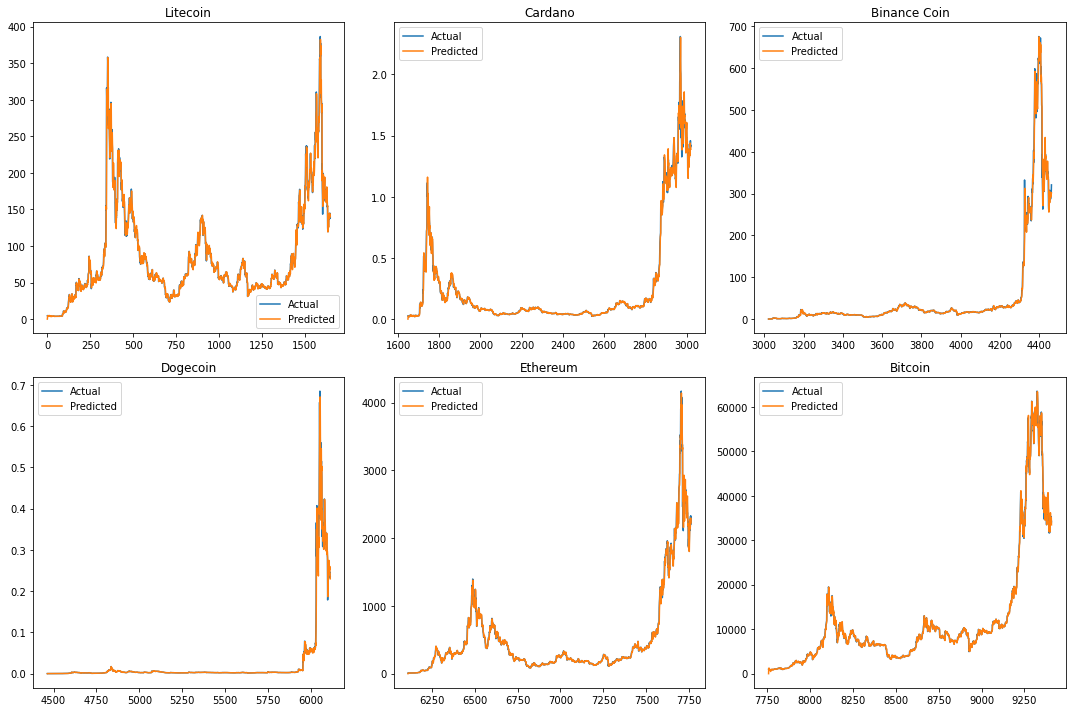

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
data = pd.read_csv('sixcrypto.csv')

# Define a list of cryptocurrencies
cryptos = ['Litecoin', 'Cardano', 'Binance Coin', 'Dogecoin', 'Ethereum', 'Bitcoin']

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Loop over each cryptocurrency and fit a SARIMA model
for i, crypto in enumerate(cryptos):
    # Select the rows corresponding to the current cryptocurrency
    crypto_data = data[data['Name'] == crypto]
    
    # Specify the order of the SARIMA model
    order = (2, 1, 1)
    
    # Specify the seasonal order
    seasonal_order = (1, 0, 1, 12)
    
    # Fit the SARIMA model
    model = SARIMAX(crypto_data['Close'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit()
    
    # Plot the SARIMA model
    ax = axs[i//3, i%3]
    ax.plot(crypto_data['Close'], label='Actual')
    ax.plot(results.predict(start=0, end=len(crypto_data)-1), label='Predicted')
    ax.set_title(crypto)
    ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
data = pd.read_csv('sixcrypto.csv')

# Define a list of cryptocurrencies
cryptos = ['Litecoin', 'Cardano', 'Binance Coin', 'Dogecoin', 'Ethereum', 'Bitcoin']

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Cryptocurrency', 'Model', 'Log Likelihood', 'AIC', 'BIC', 'ar.L1', 'ar.L2', 'ma.L1', 'ar.S.L12', 'ma.S.L12', 'sigma2'])

# Loop over each cryptocurrency and fit a SARIMA model
for crypto in cryptos:
    # Select the rows corresponding to the current cryptocurrency
    crypto_data = data[data['Name'] == crypto]
    
    # Specify the order of the SARIMA model
    order = (2, 1, 1)
    
    # Specify the seasonal order
    seasonal_order = (1, 0, 1, 12)
    
    # Fit the SARIMA model
    model = SARIMAX(crypto_data['Close'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit()
    
    # Extract the relevant information from the results object
    log_likelihood = results.llf
    aic = results.aic
    bic = results.bic
    ar_l1 = results.params['ar.L1']
    ar_l2 = results.params['ar.L2']
    ma_l1 = results.params['ma.L1']
    ar_s_l12 = results.params['ar.S.L12']
    ma_s_l12 = results.params['ma.S.L12']
    mse = results.mse
    
    # Add the results to the dataframe
    results_df = results_df.append({
        'Cryptocurrency': crypto,
        'Model': f"SARIMAX{order}{seasonal_order}",
        'Log Likelihood': log_likelihood,
        'AIC': aic,
        'BIC': bic,
        'ar.L1': ar_l1,
        'ar.L2': ar_l2,
        'ma.L1': ma_l1,
        'ar.S.L12': ar_s_l12,
        'ma.S.L12': ma_s_l12,
        'sigma2': mse
    }, ignore_index=True)

# Print the results dataframe
print(results_df)

C:\Users\sahmed\AppData\Local\Temp\ipykernel_26136\1886761755.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\sahmed\AppData\Local\Temp\ipykernel_26136\1886761755.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignore

  Cryptocurrency                          Model  Log Likelihood           AIC  \
0       Litecoin  SARIMAX(2, 1, 1)(1, 0, 1, 12)    -5733.000672  11478.001343   
1        Cardano  SARIMAX(2, 1, 1)(1, 0, 1, 12)     2482.816162  -4953.632323   
2   Binance Coin  SARIMAX(2, 1, 1)(1, 0, 1, 12)    -5384.207394  10780.414789   
3       Dogecoin  SARIMAX(2, 1, 1)(1, 0, 1, 12)     4961.582162  -9911.164323   
4       Ethereum  SARIMAX(2, 1, 1)(1, 0, 1, 12)    -8846.138502  17704.277003   
5        Bitcoin  SARIMAX(2, 1, 1)(1, 0, 1, 12)   -13195.006028  26402.012055   

            BIC     ar.L1     ar.L2     ma.L1  ar.S.L12  ma.S.L12  \
0  11510.390388 -0.777610  0.012926  0.748350  0.601053 -0.711994   
1  -4922.345297 -0.424859  0.138430  0.336157 -0.679719  0.519948   
2  10811.994766  0.244748  0.227471 -0.431803 -0.404084  0.282567   
3  -9878.775279  0.579499  0.121633 -1.453728  0.542910 -0.730959   
4  17736.666048 -0.050391  0.128747 -0.083529 -0.251386  0.134350   
5  26434.401100  0

C:\Users\sahmed\AppData\Local\Temp\ipykernel_26136\1886761755.py:40: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### **Residual Analysis:**

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



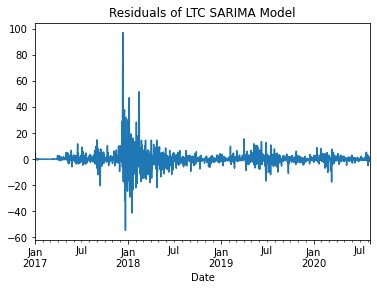

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



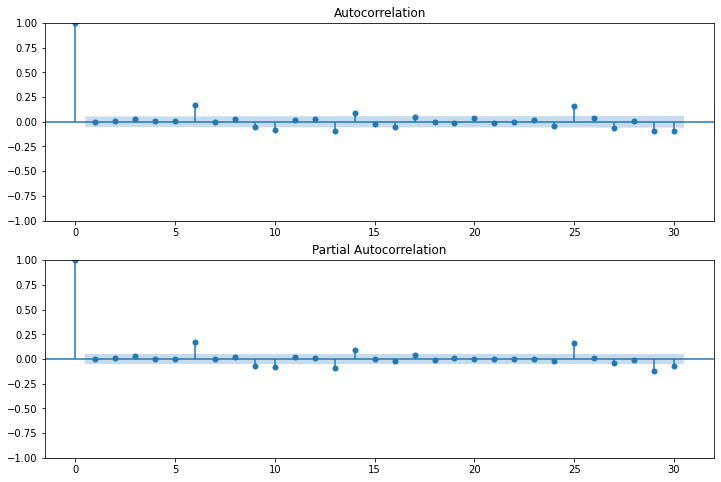

LTC Ljung-Box Q-value: l, p-value: l
LTC RMSE: 116.41756049523183


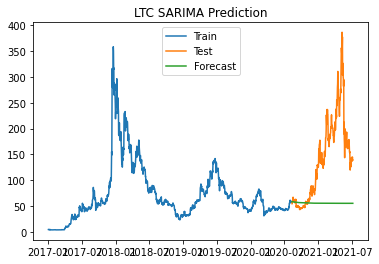

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



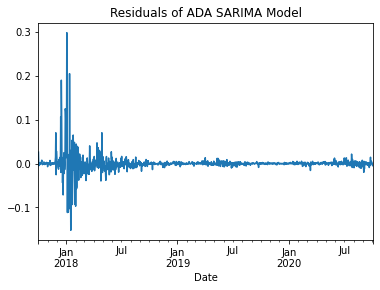

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



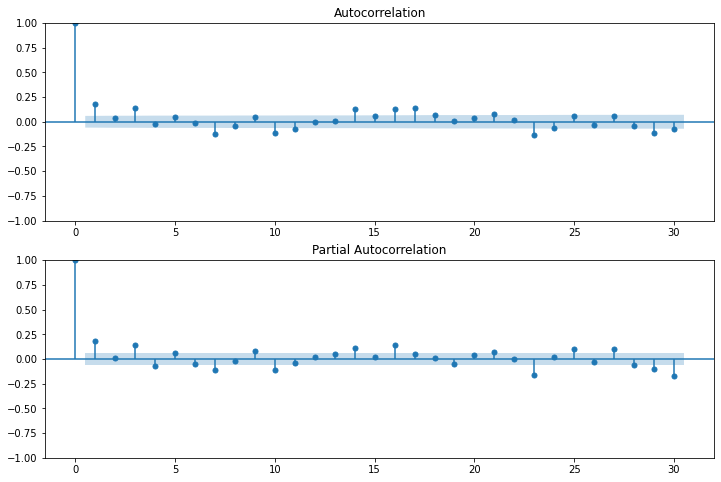

ADA Ljung-Box Q-value: l, p-value: l
ADA RMSE: 0.9398779476703334


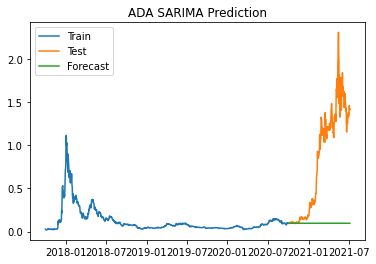

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



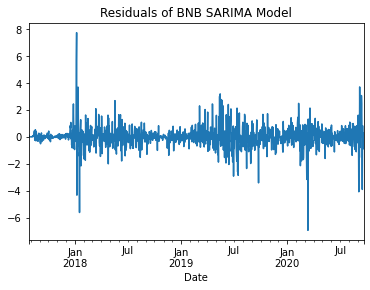

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



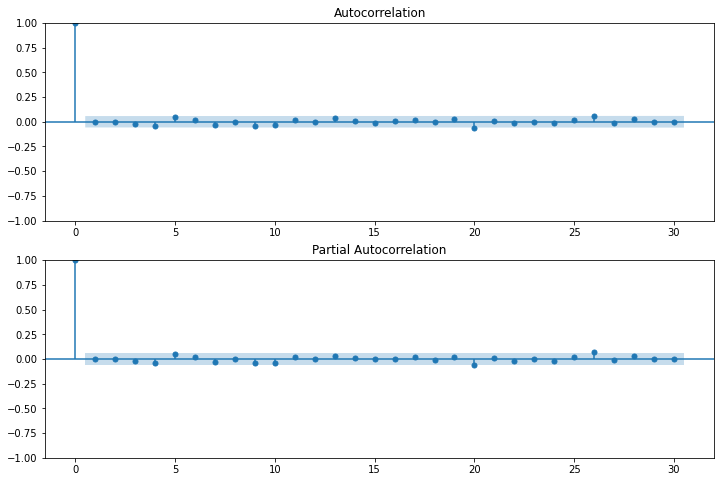

BNB Ljung-Box Q-value: l, p-value: l
BNB RMSE: 262.4255730118758


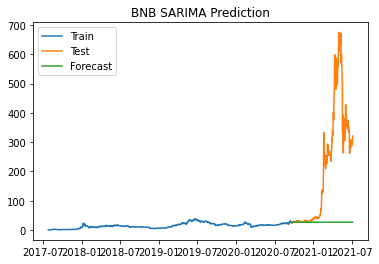

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



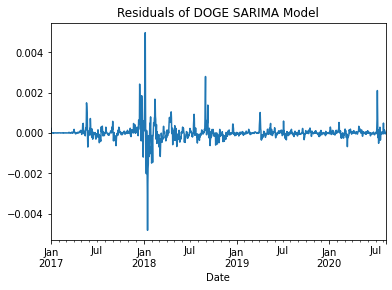

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



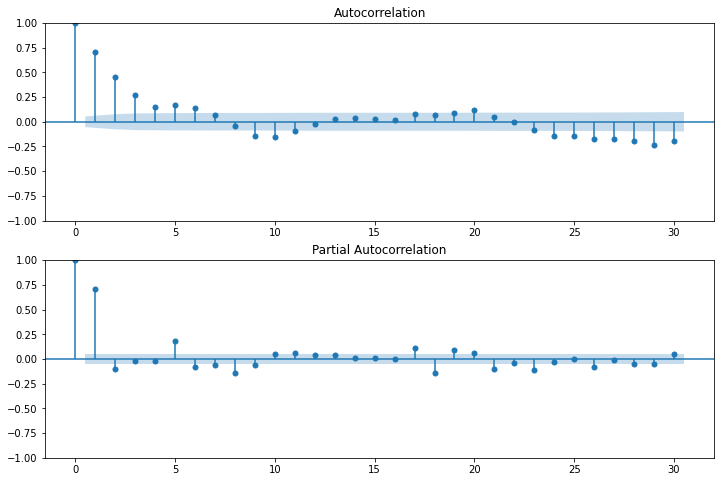

DOGE Ljung-Box Q-value: l, p-value: l
DOGE RMSE: 0.18314565784960307


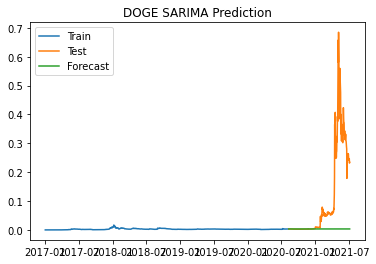

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



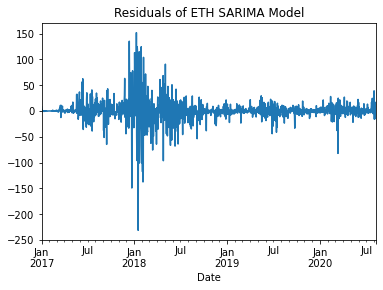

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



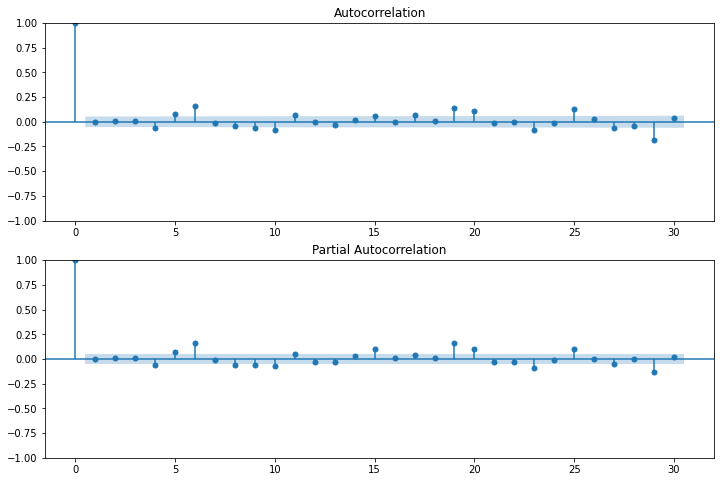

ETH Ljung-Box Q-value: l, p-value: l
ETH RMSE: 1384.677506909287


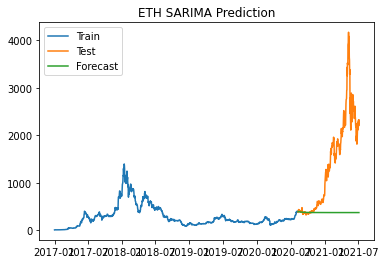

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



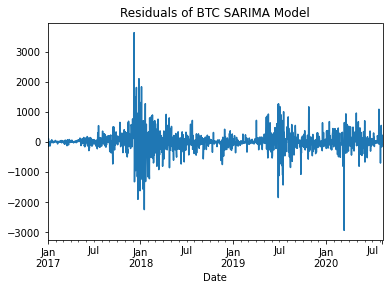

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



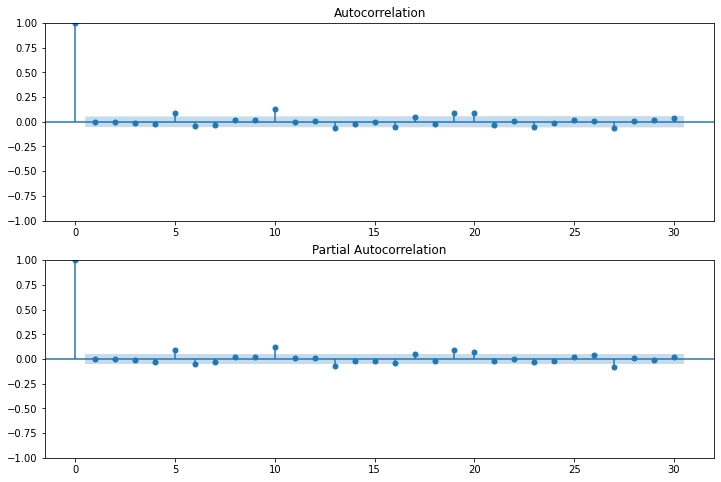

BTC Ljung-Box Q-value: l, p-value: l
BTC RMSE: 27762.785937134355


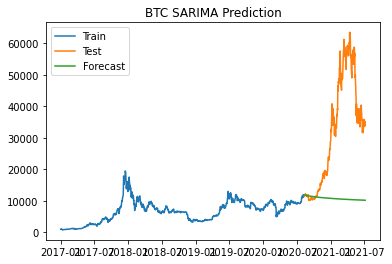

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("sixcrypto.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date column as index
df.set_index('Date', inplace=True)

# List of cryptocurrencies
cryptos = ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']

# Loop through each cryptocurrency and fit SARIMA model
for crypto in cryptos:
    # Subset data for the current cryptocurrency
    df_crypto = df.loc[df['Symbol'] == crypto]

    # Create training and test sets
    train_size = int(len(df_crypto) * 0.8)
    train, test = df_crypto.iloc[:train_size], df_crypto.iloc[train_size:]

    # Fit SARIMA model
    model = SARIMAX(train['Close'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 12), enforce_invertibility=False)
    results = model.fit()

    # Residual analysis
    residuals = results.resid
    residuals.plot()
    plt.title(f'Residuals of {crypto} SARIMA Model')
    plt.show()

    # Autocorrelation function and partial autocorrelation function of residuals
    fig, ax = plt.subplots(2,1, figsize=(12,8))
    fig = sm.graphics.tsa.plot_acf(residuals, lags=30, ax=ax[0])
    fig = sm.graphics.tsa.plot_pacf(residuals, lags=30, ax=ax[1])
    plt.show()

    # Ljung-Box test
    lbvalue, pvalue = sm.stats.acorr_ljungbox(residuals, lags=[10])
    print(f"{crypto} Ljung-Box Q-value: {lbvalue[0]}, p-value: {pvalue[0]}")

    # Out-of-sample prediction
    forecast = results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

    # Evaluate model
    mse = mean_squared_error(test['Close'], forecast)
    rmse = np.sqrt(mse)
    print(f"{crypto} RMSE: {rmse}")

    # Plot actual values and predicted values
    plt.plot(train['Close'], label='Train')
    plt.plot(test['Close'], label='Test')
    plt.plot(forecast, label='Forecast')
    plt.title(f'{crypto} SARIMA Prediction')
    plt.legend()
    plt.show()

### **Prediction Accuracy**

In [ ]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv("sixcrypto.csv")

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date column as index
df.set_index('Date', inplace=True)

# List of cryptocurrencies
cryptos = ['LTC', 'ADA', 'BNB', 'DOGE', 'ETH', 'BTC']

# Create empty lists to store evaluation metrics
mae_list = []
rmse_list = []
mape_list = []

# Loop through each cryptocurrency and fit SARIMA model
for crypto in cryptos:
    # Subset data for the current cryptocurrency
    df_crypto = df.loc[df['Symbol'] == crypto]

    # Create training and test sets
    train_size = int(len(df_crypto) * 0.8)
    train, test = df_crypto.iloc[:train_size], df_crypto.iloc[train_size:]

    # Fit SARIMA model
    model = SARIMAX(train['Close'], order=(2, 1, 1), seasonal_order=(1, 0, 1, 12), enforce_invertibility=False)
    results = model.fit()

    # Out-of-sample prediction
    forecast = results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

    # Evaluate model
    mae = mean_absolute_error(test['Close'], forecast)
    rmse = np.sqrt(mean_squared_error(test['Close'], forecast))
    mape = np.mean(np.abs((test['Close'] - forecast) / test['Close'])) * 100

    # Append evaluation metrics to lists
    mae_list.append(mae)
    rmse_list.append(rmse)
    mape_list.append(mape)

# Create dictionary of evaluation metrics
eval_dict = {'Currency': cryptos, 'MAE': mae_list, 'RMSE': rmse_list, 'MAPE': mape_list}

# Convert dictionary to dataframe
eval_df = pd.DataFrame(eval_dict)

# Set Currency as index
eval_df.set_index('Currency', inplace=True)

# Print dataframe
print(eval_df)

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was 

                   MAE          RMSE       MAPE
Currency                                       
LTC          87.505508    116.417560  48.464181
ADA           0.716512      0.939878  66.942029
BNB         177.176703    262.425573  56.175869
DOGE          0.099958      0.183146  60.892778
ETH        1004.282859   1384.677507  52.388668
BTC       21616.839108  27762.785937  52.190702


c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



### **Correlation of Predicted and Actual prices for SARIMA Model**

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import pearsonr

# Load the data from the CSV file
df = pd.read_csv('sixcrypto.csv')

# Define the time series to be analyzed
time_series = df['Close']

# Initialize an empty list to store the correlation coefficients
corr_coeffs = []

# Loop over each currency in the data
for currency in df['Name'].unique():
    # Extract the time series for the current currency
    currency_ts = df[df['Name'] == currency]['Close']
    
    # Set the parameters for the SARIMA model
    p = 1 # AR order
    d = 1 # differencing order
    q = 1 # MA order
    P = 1 # seasonal AR order
    D = 1 # seasonal differencing order
    Q = 1 # seasonal MA order
    s = 12 # seasonal period
    
    # Apply the SARIMA model to the time series
    sarima_model = SARIMAX(currency_ts, order=(p, d, q), seasonal_order=(P, D, Q, s))
    sarima_fit = sarima_model.fit()
    sarima_pred = sarima_fit.predict(start=0, end=len(currency_ts)-1, typ='levels')
    
    # Calculate the correlation coefficient between the predicted and actual values
    corr_coeff, _ = pearsonr(currency_ts, sarima_pred)
    corr_coeffs.append(corr_coeff)

# Print the results in tabular format
results = pd.DataFrame({'Name': df['Name'].unique(), 'Correlation Coefficient': corr_coeffs})
print(results)

c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\sahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA 

           Name  Correlation Coefficient
0      Litecoin                 0.992494
1       Cardano                 0.995320
2  Binance Coin                 0.995771
3      Dogecoin                 0.989109
4      Ethereum                 0.996465
5       Bitcoin                 0.998212
